In [1]:
import evaluation
import datasets
import os
import random
import networks
import loss_functions
import torch
import numpy as np
import matplotlib.pyplot as plt


from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
def print_scores(labels, predicted_labels):
    print("Accuracy: {}".format(accuracy_score(labels, predicted_labels)))
    print("Precision: {}".format(precision_score(labels, predicted_labels)))
    print("Recall: {}".format(recall_score(labels, predicted_labels)))
    print("F1: {}".format(f1_score(labels, predicted_labels)))

In [3]:
def undersample(images):
    images_false = []
    images_positive = []
    for image in images:
        images_false.append(image) if image.__contains__("False") else images_positive.append(image)

    images_false = images_false[0:len(images_positive)]
    combined = []
    combined.extend(images_false)
    combined.extend(images, positive)
    
    return combined

In [12]:
def eval_model(network, dataset_train, dataset_test):
    evaluation.plot_loss(loss_history)
    dataloader = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
    encodings, labels = evaluation.predict_encoding(network, dataloader)
    evaluation.plot_results(encodings, labels)
    
    dataloader = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
    encodings, labels = evaluation.predict_encoding(network, dataloader)
    evaluation.plot_results(encodings, labels)
    
    predicted_labels = []
    for encoding, label in (zip(encodings, labels)):
        predicted_labels.append(evaluation.predict_label(encoding, encodings, labels, 3))

    predicted_labels = np.array(predicted_labels)
    print_scores(labels, predicted_labels)

# T2 

In [5]:
path_t2_tra_np_min_max = './Data/t2_tra_np_min_max'

In [6]:
images = os.listdir(path_t2_tra_np_min_max)
random.shuffle(images)

In [7]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path_t2_tra_np_min_max, train)
dataset_test = datasets.SiameseDataset(path_t2_tra_np_min_max, test)

In [8]:
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)

In [9]:
network = networks.SiameseNet(networks.Net2DChannel1()).cuda()
loss_func = loss_functions.ContrastiveLoss()

In [10]:
%%capture
loss_history = evaluation.fit(2, network, loss_func, dataloader_train, 0.00001)

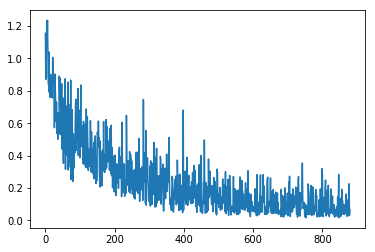

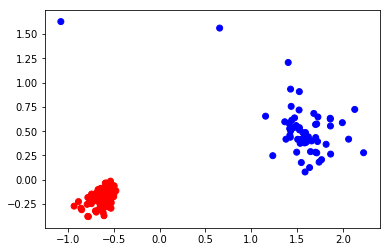

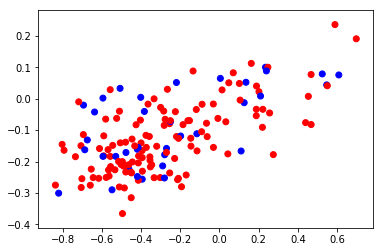

Accuracy: 0.6729559748427673
Precision: 0.19230769230769232
Recall: 0.1388888888888889
F1: 0.16129032258064516


In [13]:
eval_model(network, dataset_train, dataset_test)

# Diff

In [14]:
path_diff_tra_ADC_BVAL_np_min_max = './Data/diff_ADC_BVAL_np_min_max'

In [15]:
images = os.listdir(path_diff_tra_ADC_BVAL_np_min_max)
random.shuffle(images)
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path_diff_tra_ADC_BVAL_np_min_max, train)
dataset_test = datasets.SiameseDataset(path_diff_tra_ADC_BVAL_np_min_max, test)

In [16]:
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)

In [17]:
network = networks.SiameseNet(networks.Net2DChannel2()).cuda()
loss_func = loss_functions.ContrastiveLoss()

In [18]:
%%capture
loss_history = evaluation.fit(1, network, loss_func, dataloader_train, 0.00001)

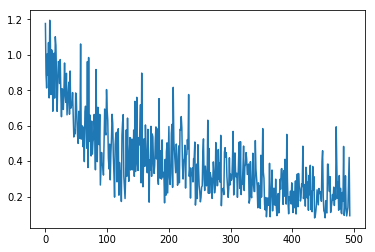

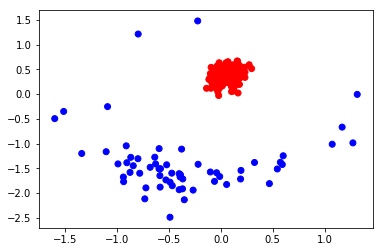

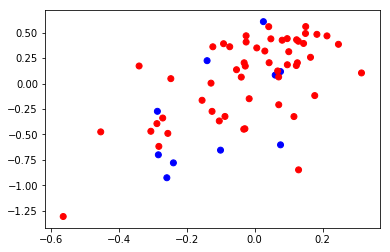

Accuracy: 0.8412698412698413
Precision: 0.5
Recall: 0.4
F1: 0.4444444444444445


In [19]:
eval_model(network, dataset_train, dataset_test)

# T2 3D

In [20]:
path_t2_tra_np_3D_min_max = './Data/t2_tra_np_3D_min_max'

In [21]:
images = os.listdir(path_t2_tra_np_3D_min_max)
random.shuffle(images)
train, test = train_test_split(images, test_size=0.2)
dataset_train = datasets.SiameseDataset(path_t2_tra_np_3D_min_max, train)
dataset_test = datasets.SiameseDataset(path_t2_tra_np_3D_min_max, test)

In [22]:
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)

In [23]:
network = networks.SiameseNet(networks.Net3DChannel1()).cuda()
loss_func = loss_functions.ContrastiveLoss()

In [24]:
%%capture
loss_history = evaluation.fit(1, network, loss_func, dataloader_train, 0.00001)

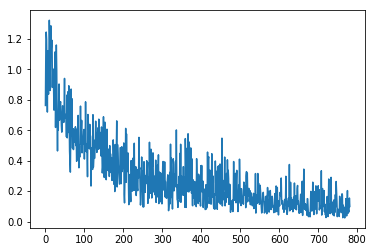

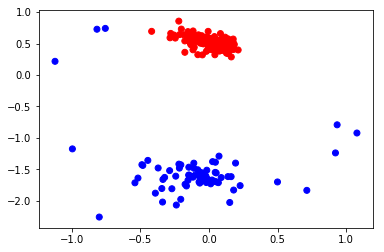

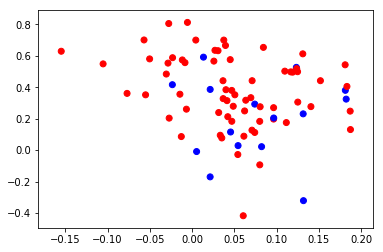

Accuracy: 0.7625
Precision: 0.16666666666666666
Recall: 0.06666666666666667
F1: 0.09523809523809522


In [25]:
eval_model(network, dataset_train, dataset_test)